## Analyse descriptive avec GraphLab Create

In [1]:
import graphlab as gl
import re
from datetime import datetime
import pandas

In [9]:
!python -V

Python 3.5.2 :: Anaconda custom (64-bit)


#### Pour mésurer le temps d'opération pour chaque cellule du notebook:

In [10]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

/home/user9/anaconda3/envs/gl-env/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed autotime.py. To use it, type:
  %load_ext autotime


Lecture de la base des crimes à San Francisco : 

In [11]:
sfpd = gl.SFrame.read_csv("SFPD.csv",column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int])

This non-commercial license of GraphLab Create for academic use is assigned to mariem.gargouri@gmail.com and will expire on September 23, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1474764929.log


Read 255188 lines. Lines per second: 68585

Read 1022077 lines. Lines per second: 116580

Finished parsing file /home/user9/Téléchargements/SFPD.csv

Parsing completed. Parsed 1960700 lines in 14.0152 secs.

time: 17.7 s


On commence par générer automatiquement la description pour chaque colonne en fonction de son type.

In [8]:
sfpd.show()

Canvas is accessible via web browser at the URL: http://localhost:40032/index.html
Opening Canvas in default web browser.


ERROR:tornado.access:500 GET /sketch/%EF%BB%BFIncidntNum (127.0.0.1) 34.86ms


Pour afficher les viz de Graphlab directement dans le Notebook : 

In [12]:
gl.canvas.set_target('ipynb')

time: 121 ms


Pour retourner à l'affichage complet : 

In [283]:
# gl.canvas.set_target('browser')

time: 2.15 ms


# Description de la base de données : 

In [151]:
sfpd.num_rows

<bound method SFrame.num_rows of Columns:
	﻿IncidntNum	int
	Category	str
	Descript	str
	DayOfWeek	str
	Date	str
	Time	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	float
	Y	float
	Location	str
	PdId	int

Rows: 1957852

Data:
+-------------+----------------+------------------------------+-----------+
| ﻿IncidntNum |    Category    |           Descript           | DayOfWeek |
+-------------+----------------+------------------------------+-----------+
|  100475254  |    ASSAULT     |           BATTERY            |   Friday  |
|  100475254  |    WARRANTS    |        WARRANT ARREST        |   Friday  |
|  100475254  |  NON-CRIMINAL  | AIDED CASE, MENTAL DISTURBED |   Friday  |
|  110914565  |    WARRANTS    |        WARRANT ARREST        |   Friday  |
|   11351210  | MISSING PERSON |         FOUND PERSON         |  Tuesday  |
|  120789988  | MISSING PERSON |         FOUND PERSON         |   Monday  |
|  140608681  |    ROBBERY     |    ROBBERY, BODILY FORCE     |  Thursday |
|  140608

time: 87.4 ms


In [149]:
sfpd['Date'].show()

time: 1.15 s


In [152]:
sfpd.column_names()

['\xef\xbb\xbfIncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

time: 4.3 ms


### Données de l'année 2016:

par adresse

In [76]:
sfpd['Address'][sfpd['Date'].contains('2016')].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 95343 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  | 13952 |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+------------------------+------------------------+--------------------------+
| value | 800 Block of BRYANT ST | 800 Block of MARKET ST | 1000 Block of POTRERO AV |
+-------+------------------------+------------------------+--------------------------+
| count |          2230          |          857           |           408            |
+-------+------------------------+------------------------+--------------------------+
+------------------------+-----------------------------+------------------------------+
| 900 Block of MARKET ST | 0 Block of UNITEDNATIONS PZ | 500 Block of JOHNFKENNEDY DR |
+------------------------+-----------------------------+------------------------------

In [153]:
sfpd['Address'].sketch_summary()


+------------------+---------+----------+
|       item       |  value  | is exact |
+------------------+---------+----------+
|      Length      | 1957852 |   Yes    |
| # Missing Values |    0    |   Yes    |
| # unique values  |  24914  |    No    |
+------------------+---------+----------+

Most frequent items:
+-------+------------------------+------------------------+--------------------------+
| value | 800 Block of BRYANT ST | 800 Block of MARKET ST | 2000 Block of MISSION ST |
+-------+------------------------+------------------------+--------------------------+
| count |         58248          |         15238          |          10490           |
+-------+------------------------+------------------------+--------------------------+
+--------------------------+------------------------+--------------------+-------------------+
| 1000 Block of POTRERO AV | 900 Block of MARKET ST | 0 Block of TURK ST | 0 Block of 6TH ST |
+--------------------------+------------------------+-----

time: 1.39 s


In [75]:
sfpd['PdDistrict'].show()

## Split le champs "Date" en année - mois - jour : 

In [154]:
sfpd['Year']=sfpd['Date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y').year)
sfpd['Month']=sfpd['Date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y').month)
sfpd['Day']=sfpd['Date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y').day)

time: 6.46 s


In [155]:
sfpd['Year','Month','Day'].show()

time: 46.4 s


In [118]:
sfpd[sfpd['Address'].contains('800 Block of BRYANT ST')].show()

## Extraction de la liste des coordonnées uniques : 

In [54]:
unique_coords = list(set(sfpd['Location']))

time: 2.65 s


In [57]:
unique_coords

['(37.7638126844306, -122.456670565112)',
 '(37.7806243476395, -122.509879755443)',
 '(37.7518870787623, -122.508238363207)',
 '(37.7422553063427, -122.402289971911)',
 '(37.754404748573, -122.405248327082)',
 '(37.7150736699192, -122.448458098344)',
 '(37.7375161241247, -122.418860969819)',
 '(37.7720402284409, -122.414148604934)',
 '(37.720467659541, -122.397490733097)',
 '(37.7659226957027, -122.427661930817)',
 '(37.7217937925358, -122.397014793661)',
 '(37.721435763041, -122.436724043712)',
 '(37.7651192951994, -122.407544906452)',
 '(37.7216178242752, -122.435066260529)',
 '(37.7284180706602, -122.450000790445)',
 '(37.7957458265093, -122.407107913789)',
 '(37.7727842765697, -122.478297956235)',
 '(37.8014549885662, -122.404638077211)',
 '(37.7813151199526, -122.455389197974)',
 '(37.7745652547201, -122.501598092064)',
 '(37.7788663496622, -122.489953332298)',
 '(37.7542717530655, -122.437129000157)',
 '(37.731702030339, -122.483658105938)',
 '(37.7341714275463, -122.387911252085

time: 39.9 ms


In [139]:
len(unique_coords)

37097

time: 3.64 ms


## Scraping des Zip codes avec l'API GeoNames

In [141]:
import re
import xml.etree.ElementTree as ET
import urllib2
from xml.dom import minidom
import time
import csv

# time.sleep(5)  - 5 sec pause d'execution du code

time: 2.11 ms


API GeoNames est limité à 2000 requètes par heure par utilisateur. Il faut modifier le code ci-dessous en conséquence si besoin de réconstituer toute la base.

In [61]:
#response = urllib2.urlopen(apilink)
#apixml = response.read()

In [3]:
#apixml

In [68]:
#xmldoc = minidom.parseString(apixml)

In [1]:
#xmldoc

In [72]:
#obs_values = xmldoc.getElementsByTagName('postalcode')

In [2]:
#print obs_values[0].firstChild.nodeValue

In [44]:
#postalcodes = [minidom.parseString(urllib2.urlopen("http://api.geonames.org/findNearbyPostalCodes?lat="+lat+"&lng="+lng+"&maxRows=1&username=linnlinn").read()).getElementsByTagName('postalcode')[0].firstChild.nodeValue for lat, lng in zip(X,Y)]

In [48]:
#postCodesList = zip(X, Y, postalcodes)

time: 2.81 ms


In [123]:
#username = 'fitec'
username = 'linnlinn'
print('userName=%s' % username)

userName=linnlinn
time: 1.08 ms


In [129]:
#time.sleep(3000)
#utiliser sleep pour éviter de dépasser la limite de l'API
for i in range(0,37):
    test_list = unique_coords[i*1000:(i+1)*1000]
    X = [re.search("^\((\d+\.*\d*),",element).group(1) for element in test_list]
    Y = [re.search("(-\d+\.*\d*)\)",element).group(1) for element in test_list]
    postalcodes = [minidom.parseString(urllib2.urlopen("http://api.geonames.org/findNearbyPostalCodes?lat="+lat+"&lng="+lng+"&maxRows=1&username=%s" % username).read()).getElementsByTagName('postalcode')[0].firstChild.nodeValue for lat, lng in zip(X,Y)]
    postCodesList = zip(X, Y, postalcodes)
    with open('postcodes%i.csv' % i, 'wb') as csvfile:
        wr = csv.writer(csvfile, delimiter=',')
        fieldnames = ['X', 'Y', 'ZipCode']
        wr.writerow(fieldnames)
        [wr.writerow(row) for row in postCodesList]
        csvfile.close()

time: 44.2 s


## Croisement des données

Lecture des fichiers zipcodes un après l'autre et merge:

In [261]:
zipcodesDF = gl.SFrame.read_csv('postcodes0.csv',column_type_hints=[str,str,str])
for i in range(1,38):
    tempDF = gl.SFrame.read_csv('postcodes%i.csv' % i,column_type_hints=[str,str,str])
    zipcodesDF = zipcodesDF.append(tempDF)


Finished parsing file /home/user3/postcodes0.csv

Parsing completed. Parsed 1000 lines in 0.113344 secs.

Finished parsing file /home/user3/postcodes1.csv

Parsing completed. Parsed 1000 lines in 0.052836 secs.

Finished parsing file /home/user3/postcodes2.csv

Parsing completed. Parsed 1000 lines in 0.051237 secs.

Finished parsing file /home/user3/postcodes3.csv

Parsing completed. Parsed 1000 lines in 0.048465 secs.

Finished parsing file /home/user3/postcodes4.csv

Parsing completed. Parsed 1000 lines in 0.043036 secs.

Finished parsing file /home/user3/postcodes5.csv

Parsing completed. Parsed 1000 lines in 0.044458 secs.

Finished parsing file /home/user3/postcodes6.csv

Parsing completed. Parsed 1000 lines in 0.043231 secs.

Finished parsing file /home/user3/postcodes7.csv

Parsing completed. Parsed 1000 lines in 0.034949 secs.

Finished parsing file /home/user3/postcodes8.csv

Parsing completed. Parsed 1000 lines in 0.029234 secs.

Read 1000 lines. Lines per second: 21856.5

Finished parsing file /home/user3/postcodes9.csv

Parsing completed. Parsed 1000 lines in 0.047445 secs.

Finished parsing file /home/user3/postcodes10.csv

Parsing completed. Parsed 1000 lines in 0.042462 secs.

Finished parsing file /home/user3/postcodes11.csv

Parsing completed. Parsed 1000 lines in 0.031246 secs.

Finished parsing file /home/user3/postcodes12.csv

Parsing completed. Parsed 1000 lines in 0.029455 secs.

Finished parsing file /home/user3/postcodes13.csv

Parsing completed. Parsed 1000 lines in 0.032302 secs.

Finished parsing file /home/user3/postcodes14.csv

Parsing completed. Parsed 1000 lines in 0.03555 secs.

Finished parsing file /home/user3/postcodes15.csv

Parsing completed. Parsed 1000 lines in 0.048704 secs.

Finished parsing file /home/user3/postcodes16.csv

Parsing completed. Parsed 1000 lines in 0.027463 secs.

Finished parsing file /home/user3/postcodes17.csv

Parsing completed. Parsed 1000 lines in 0.034979 secs.

Finished parsing file /home/user3/postcodes18.csv

Parsing completed. Parsed 1000 lines in 0.026093 secs.

Finished parsing file /home/user3/postcodes19.csv

Parsing completed. Parsed 1000 lines in 0.033453 secs.

Finished parsing file /home/user3/postcodes20.csv

Parsing completed. Parsed 1000 lines in 0.029105 secs.

Finished parsing file /home/user3/postcodes21.csv

Parsing completed. Parsed 1000 lines in 0.03423 secs.

Finished parsing file /home/user3/postcodes22.csv

Parsing completed. Parsed 1000 lines in 0.032056 secs.

Finished parsing file /home/user3/postcodes23.csv

Parsing completed. Parsed 1000 lines in 0.033528 secs.

Finished parsing file /home/user3/postcodes24.csv

Parsing completed. Parsed 1000 lines in 0.029502 secs.

Finished parsing file /home/user3/postcodes25.csv

Parsing completed. Parsed 1000 lines in 0.033144 secs.

Finished parsing file /home/user3/postcodes26.csv

Parsing completed. Parsed 1000 lines in 0.031246 secs.

Finished parsing file /home/user3/postcodes27.csv

Parsing completed. Parsed 1000 lines in 0.033839 secs.

Finished parsing file /home/user3/postcodes28.csv

Parsing completed. Parsed 1000 lines in 0.031217 secs.

Finished parsing file /home/user3/postcodes29.csv

Parsing completed. Parsed 1000 lines in 0.032134 secs.

Finished parsing file /home/user3/postcodes30.csv

Parsing completed. Parsed 1000 lines in 0.031562 secs.

Finished parsing file /home/user3/postcodes31.csv

Parsing completed. Parsed 1000 lines in 0.032252 secs.

Finished parsing file /home/user3/postcodes32.csv

Parsing completed. Parsed 1000 lines in 0.02948 secs.

Finished parsing file /home/user3/postcodes33.csv

Parsing completed. Parsed 1000 lines in 0.032146 secs.

Finished parsing file /home/user3/postcodes34.csv

Parsing completed. Parsed 1000 lines in 0.029824 secs.

Finished parsing file /home/user3/postcodes35.csv

Parsing completed. Parsed 1000 lines in 0.029683 secs.

Finished parsing file /home/user3/postcodes36.csv

Parsing completed. Parsed 1000 lines in 0.028644 secs.

Finished parsing file /home/user3/postcodes37.csv

Parsing completed. Parsed 97 lines in 0.031261 secs.

time: 1.81 s


In [234]:
zipcodesDF.show()

time: 147 ms


In [262]:
locDF=zipcodesDF.pack_columns(columns=['X','Y'],new_column_name="Location")
zipcodesDF['Location']=locDF['Location']
zipcodesDF['Location']=zipcodesDF['Location'].apply(lambda x: "("+ x[0]+", "+x[1]+")")
locDF['Location']=locDF['Location'].apply(lambda x: "("+ x[0]+", "+x[1]+")")

time: 56.3 ms


time: 16.2 ms


In [263]:
locDF.show

<bound method SFrame.show of Columns:
	ZipCode	str
	Location	str

Rows: 37097

Data:
+---------+-------------------------------+
| ZipCode |            Location           |
+---------+-------------------------------+
|  94131  | (37.7638126844306, -122.45... |
|  94121  | (37.7806243476395, -122.50... |
|  94122  | (37.7518870787623, -122.50... |
|  94124  | (37.7422553063427, -122.40... |
|  94110  | (37.754404748573, -122.405... |
|  94112  | (37.7150736699192, -122.44... |
|  94110  | (37.7375161241247, -122.41... |
|  94103  | (37.7720402284409, -122.41... |
|  94124  | (37.720467659541, -122.397... |
|  94114  | (37.7659226957027, -122.42... |
+---------+-------------------------------+
[37097 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.>

time: 32.2 ms


In [275]:
sfpd_zip=sfpd.join(locDF, on=['Location'], how='outer')

time: 10.5 s


In [276]:
sfpd_zip.show

<bound method SFrame.show of Columns:
	﻿IncidntNum	int
	Category	str
	Descript	str
	DayOfWeek	str
	Date	str
	Time	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	str
	Y	str
	Location	str
	PdId	int
	ZipCode	str

Rows: 1957852

Data:
+-------------+----------------+------------------------------+-----------+
| ﻿IncidntNum |    Category    |           Descript           | DayOfWeek |
+-------------+----------------+------------------------------+-----------+
|  100475254  |    ASSAULT     |           BATTERY            |   Friday  |
|  100475254  |    WARRANTS    |        WARRANT ARREST        |   Friday  |
|  100475254  |  NON-CRIMINAL  | AIDED CASE, MENTAL DISTURBED |   Friday  |
|  110914565  |    WARRANTS    |        WARRANT ARREST        |   Friday  |
|   11351210  | MISSING PERSON |         FOUND PERSON         |  Tuesday  |
|  120789988  | MISSING PERSON |         FOUND PERSON         |   Monday  |
|  140608681  |    ROBBERY     |    ROBBERY, BODILY FORCE     |  Thursday |
|  1

time: 149 ms


In [277]:
sfpd_zip['ZipCode'].sketch_summary()


+------------------+---------+----------+
|       item       |  value  | is exact |
+------------------+---------+----------+
|      Length      | 1957852 |   Yes    |
| # Missing Values |    0    |   Yes    |
| # unique values  |    30   |    No    |
+------------------+---------+----------+

Most frequent items:
+-------+--------+--------+--------+--------+--------+--------+-------+-------+
| value | 94103  | 94102  | 94110  | 94109  | 94124  | 94112  | 94117 | 94107 |
+-------+--------+--------+--------+--------+--------+--------+-------+-------+
| count | 285684 | 241434 | 204472 | 151977 | 131835 | 101589 | 82231 | 79772 |
+-------+--------+--------+--------+--------+--------+--------+-------+-------+
+-------+-------+
| 94115 | 94133 |
+-------+-------+
| 77925 | 67852 |
+-------+-------+


time: 524 ms


In [316]:
set(sfpd_zip['ZipCode'])

{'94014',
 '94015',
 '94102',
 '94103',
 '94104',
 '94105',
 '94107',
 '94108',
 '94109',
 '94110',
 '94111',
 '94112',
 '94114',
 '94115',
 '94116',
 '94117',
 '94118',
 '94121',
 '94122',
 '94123',
 '94124',
 '94127',
 '94129',
 '94130',
 '94131',
 '94132',
 '94133',
 '94134',
 '94158',
 'H0H'}

time: 1.02 s


In [320]:
sfpd_zip.export_csv('~/sfpd_zip.csv')

time: 17.2 s


### Jointure avec les données du scraping : 

In [306]:
scrapDF = gl.SFrame.read_csv('~/SF_scrap_data.csv',column_type_hints=[int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str])

Read 26 lines. Lines per second: 3198.03

Finished parsing file /home/user3/SF_scrap_data.csv

Parsing completed. Parsed 26 lines in 0.008217 secs.

time: 19.9 ms


In [307]:
scrapDF.show

<bound method SFrame.show of Columns:
	X1	int
	American Indian population	float
	Asian population	float
	Average Adjusted Gross Income (AGI) in 2012	float
	Average household size	float
	Black population	float
	Estimated zip code population in 2013	float
	Females	float
	Hispanic or Latino population	float
	Houses and condos	float
	Land area	float
	Males	float
	Mar. 2016 cost of living index in zip code	float
	Median resident age	float
	Native Hawaiian and Other Pacific Islander population	float
	Population density (people per square mile)	float
	Renter-occupied apartments	float
	Residents with income below 50% of the poverty level in 2013	float
	Salary/wage	float
	Some other race population	float
	Two or more races population	float
	Water area	float
	White population	float
	Zip code population in 2000	float
	Zip code population in 2010	float
	ZipCode	str

Rows: 26

Data:
+----+----------------------------+------------------+-------------------------------+
| X1 | American Indian populat

time: 146 ms


In [311]:
scrapDF['ZipCode'].show()

Canvas is updated and available in a tab in the default browser.
time: 7.1 ms


In [388]:
sfpd_total=sfpd_zip.join(scrapDF, on=['ZipCode'], how='outer')

time: 18.3 s


In [389]:
sfpd_total.show()

time: 20.9 s


In [391]:
sfpd_total.export_csv('~/sfpd_total.csv')

time: 1min 4s


## Visualisation : 

In [376]:
#pandas.to_datetime(sfpd_total[['Time']].to_dataframe()).apply(lambda x: x.hour).value_counts().sort_index().plot(kind='line')

time: 1.47 ms


In [13]:
sfpd_total = gl.SFrame.read_csv('sfpd_total.csv',column_type_hints=[int, str, str, str, str, str, str, str, str, str, str, str, int, str, int, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float, float])

Read 157255 lines. Lines per second: 44231.1

Read 629028 lines. Lines per second: 70364.2

Read 1101142 lines. Lines per second: 77897.6

Read 1730635 lines. Lines per second: 86794.9

Finished parsing file /home/user9/Téléchargements/sfpd_total.csv

Parsing completed. Parsed 1957852 lines in 21.2204 secs.

time: 21.7 s


In [14]:
%matplotlib inline

time: 981 ms


In [386]:
sfpd_tot.show

<bound method SFrame.show of Columns:
	﻿IncidntNum	int
	Category	str
	Descript	str
	DayOfWeek	str
	Date	str
	Time	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	str
	Y	str
	Location	str
	PdId	int
	ZipCode	str
	X1	int
	American Indian population	float
	Asian population	float
	Average Adjusted Gross Income (AGI) in 2012	float
	Average household size	float
	Black population	float
	Estimated zip code population in 2013	float
	Females	float
	Hispanic or Latino population	float
	Houses and condos	float
	Land area	float
	Males	float
	Mar. 2016 cost of living index in zip code	float
	Median resident age	float
	Native Hawaiian and Other Pacific Islander population	float
	Population density (people per square mile)	float
	Renter-occupied apartments	float
	Residents with income below 50% of the poverty level in 2013	float
	Salary/wage	float
	Some other race population	float
	Two or more races population	float
	Water area	float
	White population	float
	Zip code population in 2000	float
	Zip c

time: 437 ms


In [333]:
sfpd_total[['Time']].to_dataframe()

Time
0        08:00
1        08:00
2        08:00
3        16:42
4        08:55
5        00:41
6        21:00
7        21:00
8        21:00
9        09:00
10       10:21
11       11:15
12       13:12
13       14:06
14       13:30
15       13:30
16       17:30
17       18:30
18       09:25
19       14:40
20       09:30
21       11:00
22       03:52
23       00:15
24       08:20
25       07:50
26       23:00
27       13:10
28       20:00
29       21:00
...        ...
1957822  12:30
1957823  01:40
1957824  23:40
1957825  19:00
1957826  14:27
1957827  14:27
1957828  14:27
1957829  15:02
1957830  14:45
1957831  14:45
1957832  14:45
1957833  14:40
1957834  13:00
1957835  00:01
1957836  19:00
1957837  20:00
1957838  12:45
1957839  14:23
1957840  21:00
1957841  21:00
1957842  09:00
1957843  19:30
1957844  08:00
1957845  11:00
1957846  08:00
1957847  14:00
1957848  11:30
1957849  00:01
1957850  00:01
1957851  23:53

[1957852 rows x 1 columns]

time: 2.15 s


In [15]:
sfpd_total['Hour']=sfpd_total['Time'].str_to_datetime(str_format='%H:%M').split_datetime()['X.hour']

time: 1.55 s


In [370]:
sfpd_total.show(view="Bar Chart", x="Hour", y="IncidntNum")

time: 5.74 s


In [354]:
sfpd_total.show(view="Bar Chart", x="ZipCode", y="IncidntNum")

time: 677 ms


In [16]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
# Turn off warnings display
import warnings
warnings.filterwarnings('ignore')

time: 507 ms


In [17]:
def make_pairplot(data, district, time_dim):
    sns.set(style="whitegrid")
    g = sns.PairGrid(data, x_vars=data.columns[:-1], y_vars=['Category'] ,size=8, aspect=.25)
    g.map(sns.stripplot, size=8, orient="h", palette="PuBu_r", edgecolor="gray")
    g.set(title="Distribution of crimes per %s%s" % (time_dim.lower(), 
                                                     "" if district is None else " in district %s" % district),
          xlabel="Crimes", ylabel="", )    
    titles = list(data.columns[:-1].values)
    for ax, title in zip(g.axes.flat, titles):
        ax.set(title=title)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)  
        _ = plt.setp(ax.get_xticklabels(), rotation=90)
    sns.despine(left=True, bottom=True)
    plt.show()
    return g


def visualize_distribution(data, district, split_at=7, time_dim='Year'): 
    res = data[[time_dim, 'Category']].groupby([time_dim, 'Category'])[time_dim].count()
    res = res.unstack('Category').fillna(0)
    res = pd.concat([res,pd.DataFrame(res.sum(axis=0),columns=['Total']).T]).T
    res.sort(['Total'], ascending=False, inplace=True)
    res['Category'] = res.index
    ind = 1
    # fig = plt.figure()
    if split_at > 0:
        from_ = 0
        no_cols = len(res.columns)      
        while from_ < no_cols-1: 
            if  from_ + split_at < no_cols:           
                cols = list(range(from_, from_ + split_at)) + list([no_cols-1]) 
            else:
                cols = list(range(from_, no_cols))
            g = make_pairplot(res[res.columns[cols]], district, time_dim)
            # fig.add_axes(g)
            from_ = from_ + split_at
            ind += 1     
    else:      
        g = make_pairplot(res, district, time_dim)
        # fig.add_axes(g)
        ind += 1
    res = res.ix[:, :-2].T
    axes = plt.subplot(ind+1, 1, ind+1)
    axes.set_title("Boxplot of crimes per %s in district %s" % (time_dim.lower(), 
                                                                "" if district is None else " in district %s" % district))
    res.boxplot(ax=axes)
    # fig.add_axes(axes)
    plt.xticks(rotation=90)
    plt.show()

time: 73.9 ms


In [18]:
sfpd_total['Year']=sfpd_total['Date'].str_to_datetime(str_format='%m/%d/%Y').split_datetime()['X.year']

time: 2.28 s


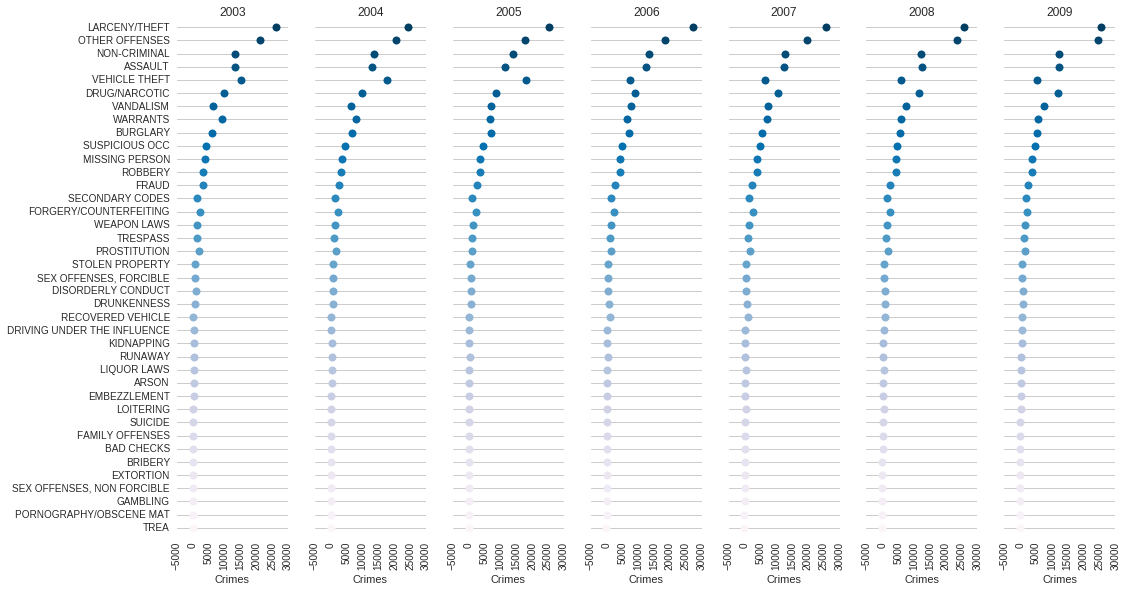

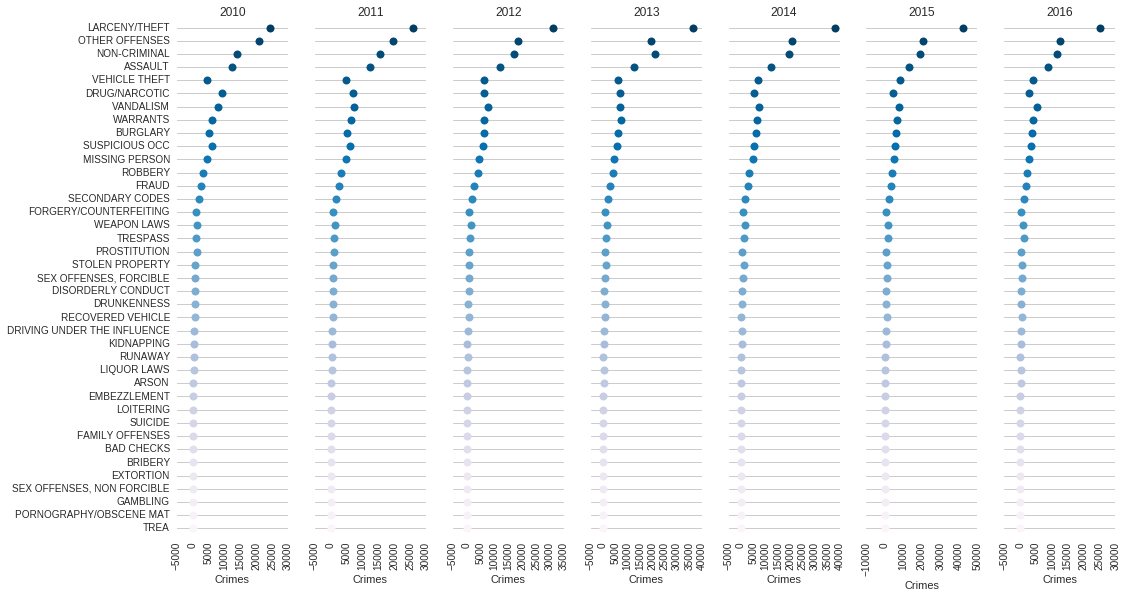

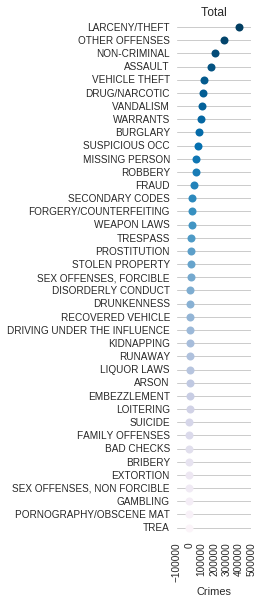

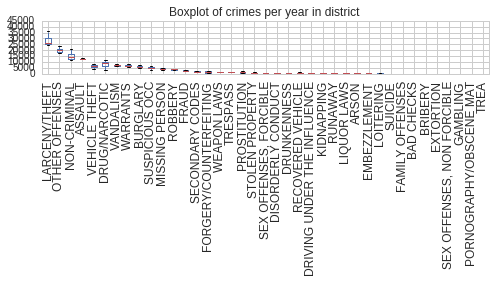

time: 12.4 s


In [20]:
data=sfpd_total['Year','Category'].to_dataframe()
visualize_distribution(data, district=None)


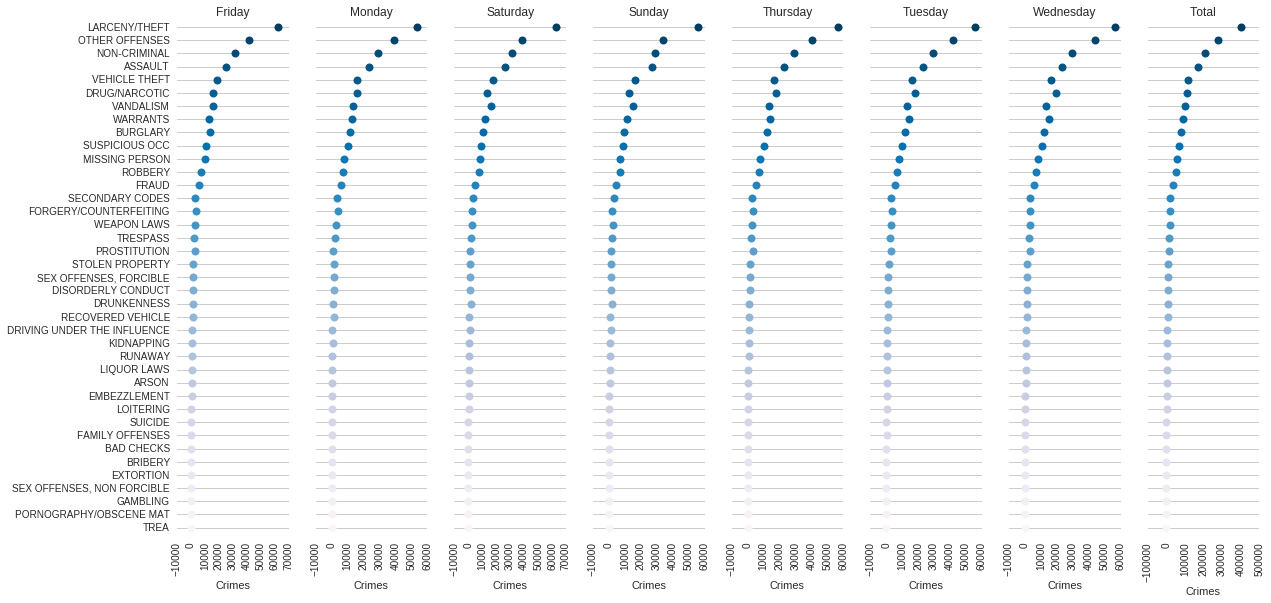

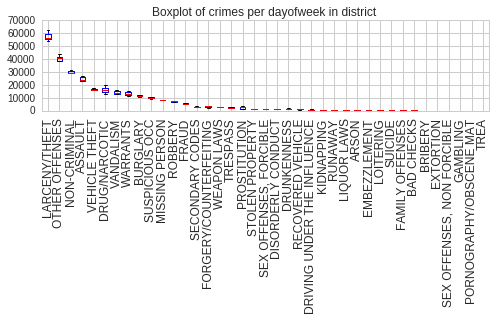

time: 10.2 s


In [369]:
data=sfpd_total['Year','Category','DayOfWeek'].to_dataframe()
visualize_distribution(data, district=None, time_dim='DayOfWeek', split_at=0)

In [21]:
#sfpd_total.column_types()

time: 2.51 ms


In [25]:
# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]


############train = pd.read_csv(z.open('train.csv'))

#Get rid of the bad lat/longs
sfpd_map =sfpd_total[(sfpd_total['X'].apply(lambda x: float(x))<-121)*(sfpd_total['Y'].apply(lambda x: float(x))<40)] 
#sfpd_total['Yok'] = sfpd_total[sfpd_total['Y'].apply(lambda x: float(x))<40]['Y']
#sfpd_total = sfpd_total.dropna()



time: 3.85 s


### <font color='red'>Attention!! Très long à executer : </font> 

ValueError: The number of observations must be larger than the number of variables.

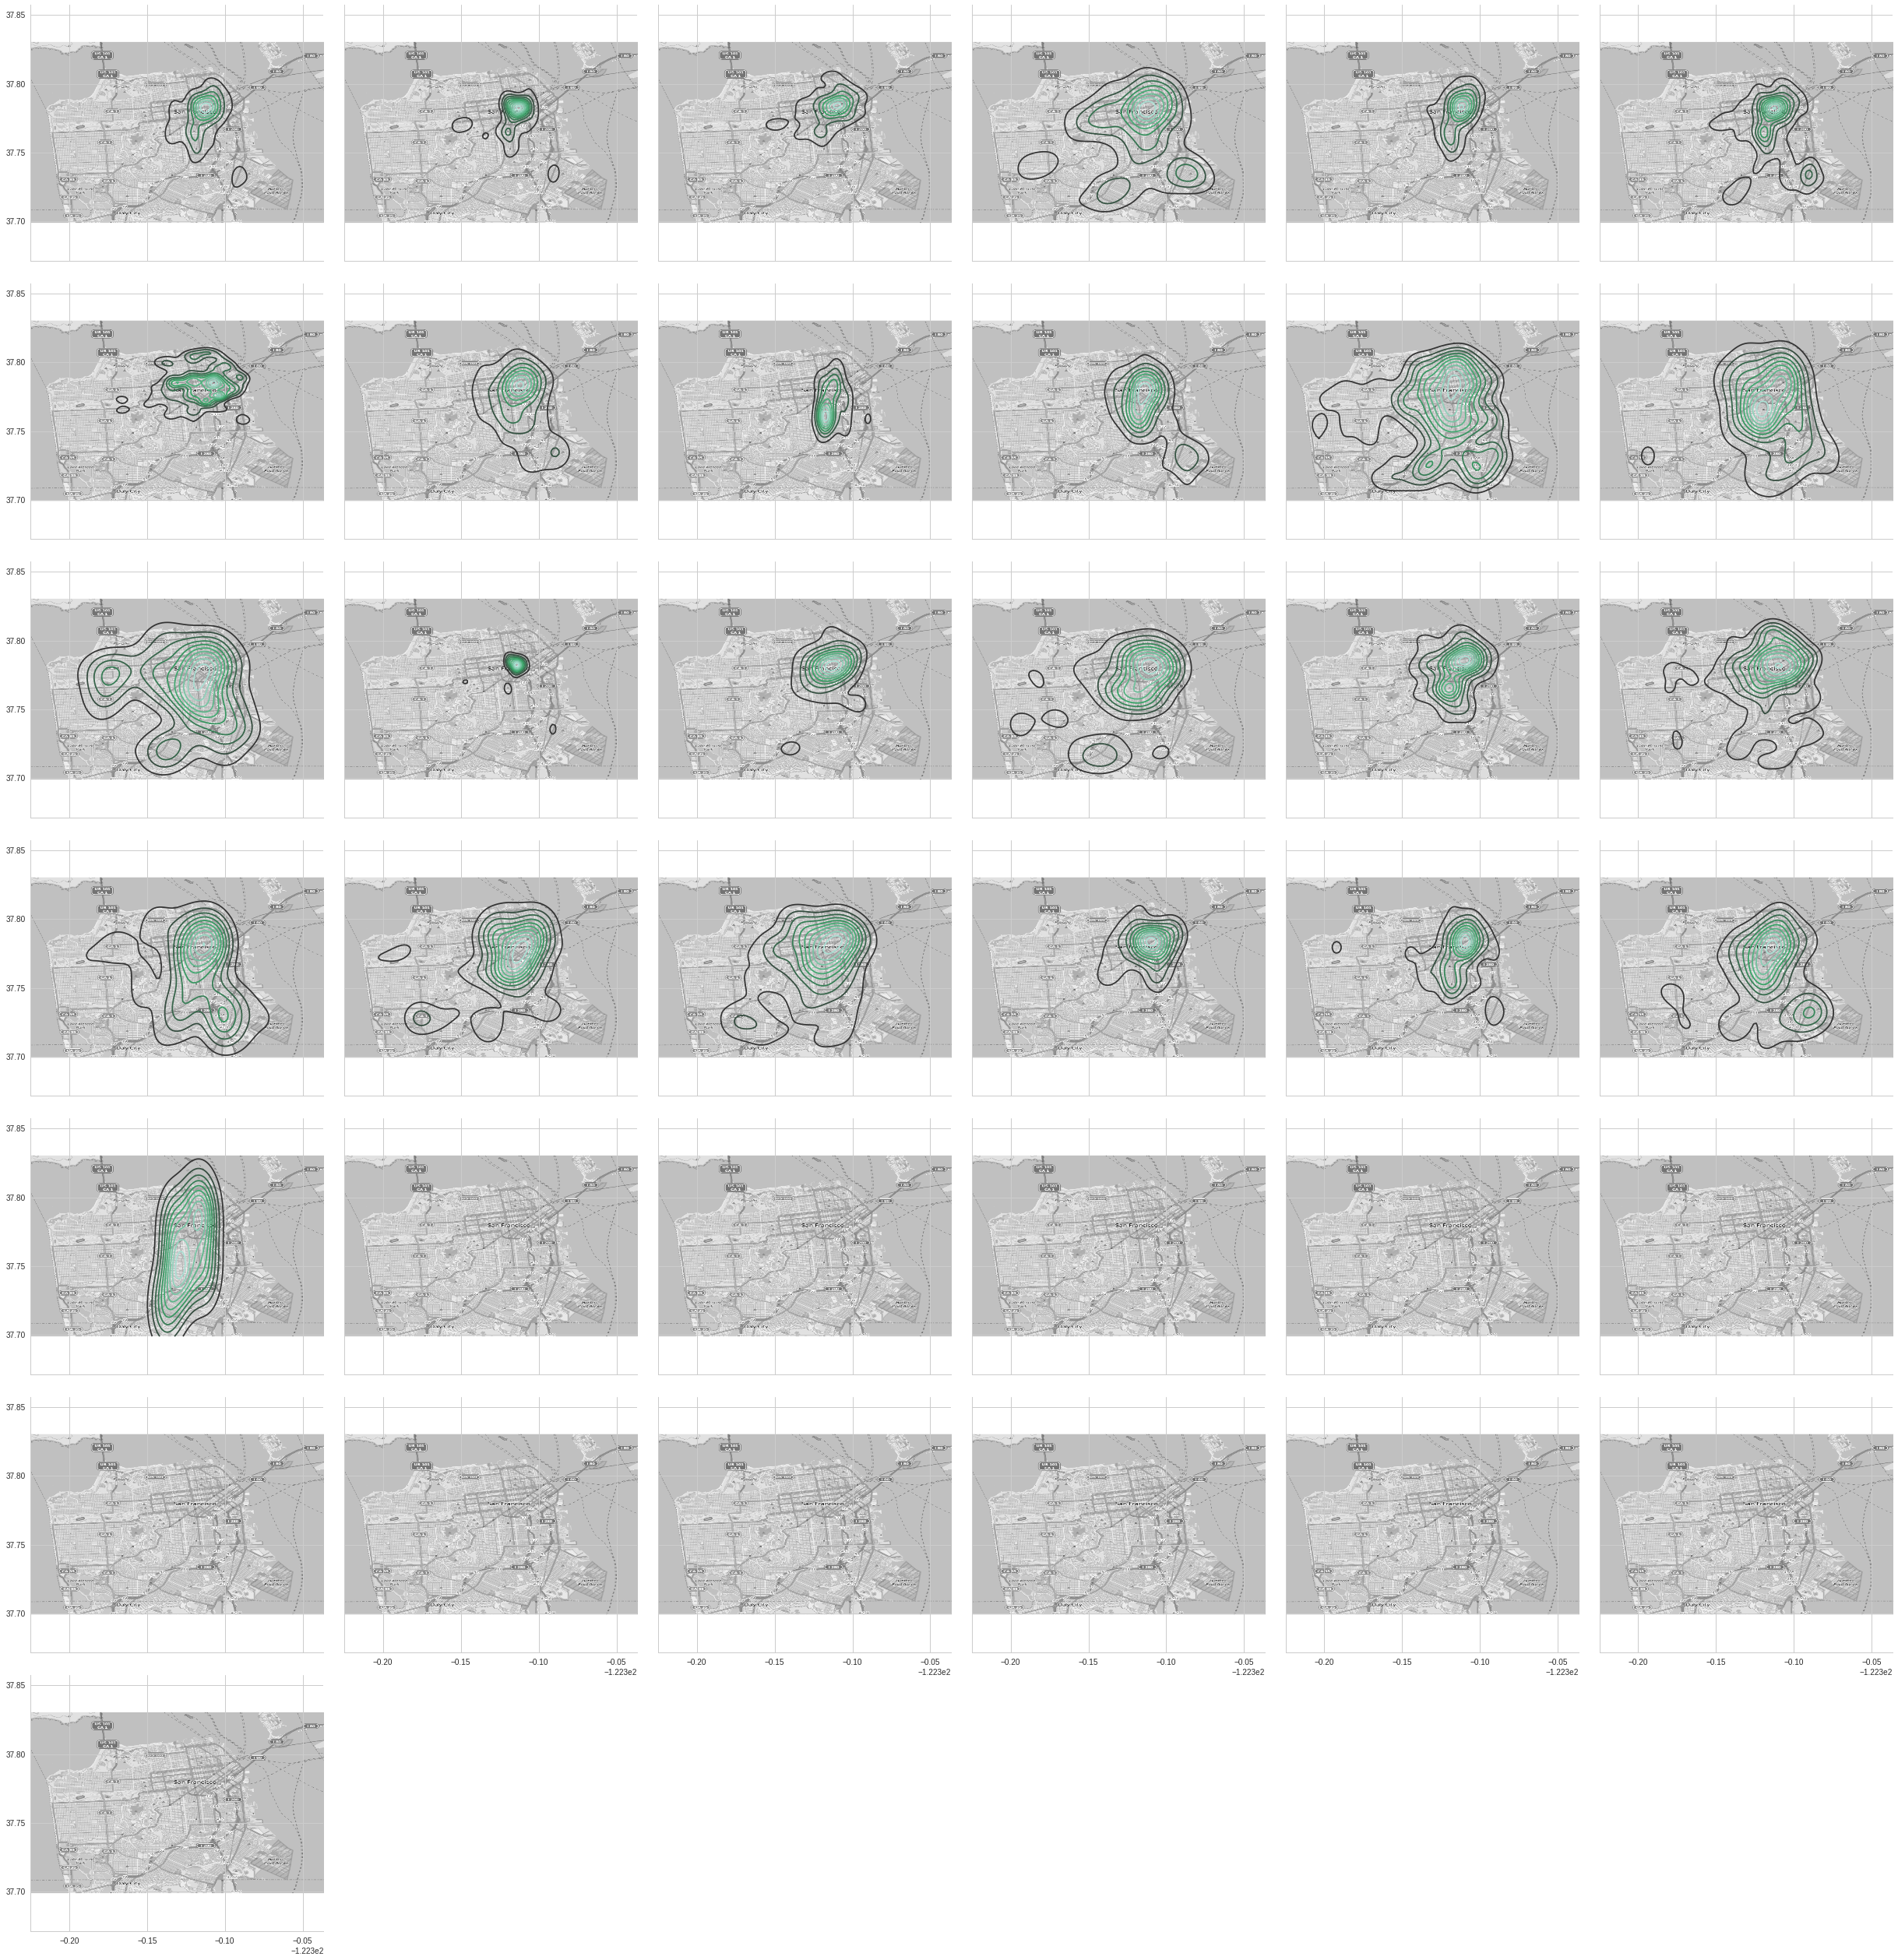

time: 1min 10s


In [33]:
#Seaborn FacetGrid, split by crime Category
g= sns.FacetGrid(sfpd_map['Category','X','Y'].to_dataframe()[:100000], col="Category", col_wrap=3, size=5, aspect=1/asp)

#Show the background map
for ax in g.axes:
    ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
#Kernel Density Estimate plot
g.map(sns.kdeplot, "X", "Y", clip=clipsize)

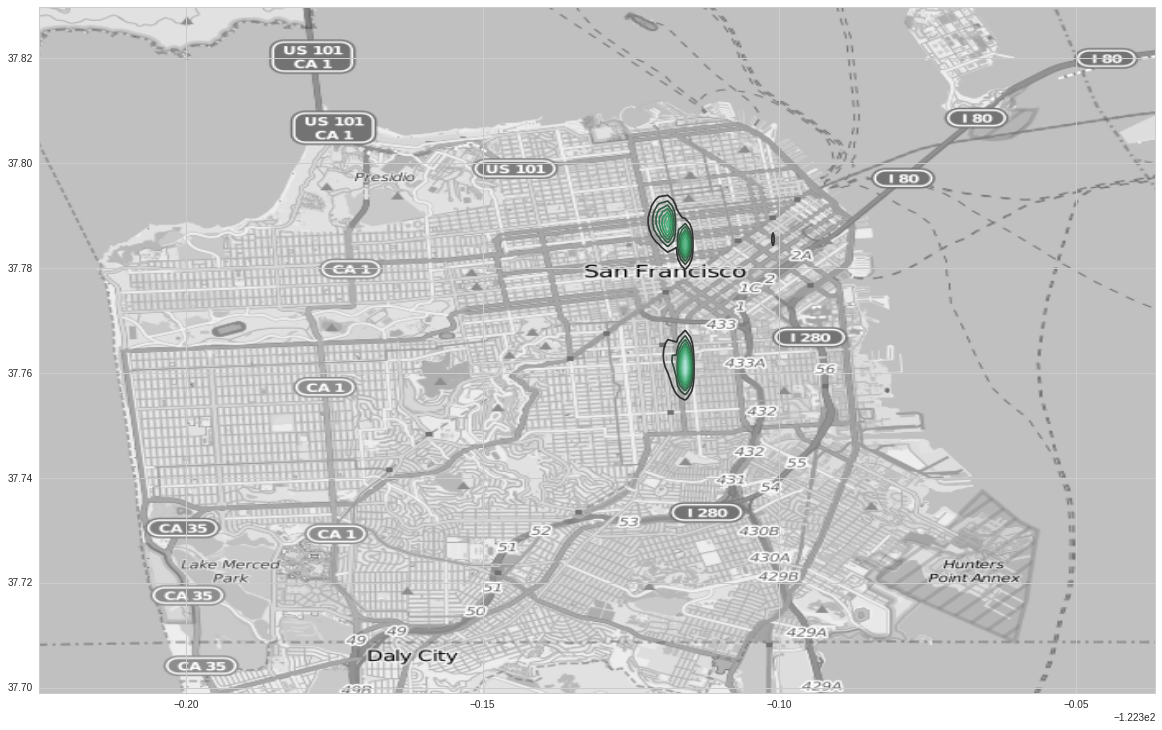

time: 32.8 s


In [34]:
#Do a larger plot with prostitution only
sfpd_map_prost = sfpd_map[sfpd_map['Category'] == 'PROSTITUTION'] #Grab the prostitution crimes
plt.figure(figsize=(20,20*asp))
ax = sns.kdeplot(sfpd_map_prost['X'].to_numpy(), sfpd_map_prost['Y'].to_numpy(), clip=clipsize, aspect=1/asp)
ax.imshow(mapdata, cmap=pl.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)

In [36]:
# -*- coding: utf-8 -*-
import os
import matplotlib
import matplotlib.image as mpimg
import statsmodels.nonparametric.api as smnp
import seaborn as sns


matplotlib.rcParams['figure.figsize'] = (15, 25)

sns.despine(fig=None, left=False, right=False, top=False, bottom=False, trim=True)

time: 16.2 ms


In [40]:


lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

def parse_timeInfo(pd_input, colname="Date"):
    l_y = []
    l_m = []
    l_d = []
    l_h = []
    for i in range(pd_input.shape[0]):
        dt = pd_input[colname][i]
        l_y.append(pd.Timestamp(dt).year)
        l_m.append(pd.Timestamp(dt).month)
        l_d.append(pd.Timestamp(dt).day)
        l_h.append(pd.Timestamp(dt).hour)
    
    pd_input['Year'] = l_y
    pd_input['Month'] = l_m
    pd_input['Day'] = l_d
    pd_input['Hour'] = l_h


def num_l_word(l_word, M_wordDict=None):
    if M_wordDict is None:
        l_word_unique = sorted(list(set(l_word)))
        M_wordDict = dict(zip(l_word_unique, range(len(l_word_unique))))
    l_word_idx = [ M_wordDict[w] for w in l_word ]
    return l_word_idx, M_wordDict

def Df_wordParseToNum(pd_input, colname, M_wordDict=None):
    l_word = list(pd_input[colname])
    l_word_idx, M_wordDict = num_l_word(l_word, M_wordDict)
    pd_input[colname] = l_word_idx
    return M_wordDict

def kde_support(data, bw, gridsize, cut, clip):
    support_min = max(data.min() - bw * cut, clip[0])
    support_max = min(data.max() + bw * cut, clip[1])
    return np.linspace(support_min, support_max, gridsize)

def smnp_kde(pd_input, cut, gridsize, clipsize, bw="scott"):
    bw_func = getattr(smnp.bandwidths, "bw_" + bw)
    x_bw = bw_func(pd_input["X"].values)
    y_bw = bw_func(pd_input["Y"].values)
    bw = [x_bw, y_bw]
    kde = smnp.KDEMultivariate( pd_input.T.values, "cc", bw)
    x_support = kde_support(pd_input['X'].values, x_bw, gridsize, cut, clipsize[0])
    y_support = kde_support(pd_input['Y'].values, y_bw, gridsize, cut, clipsize[1])
    
    xx, yy = np.meshgrid(x_support, y_support)
    Z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return xx, yy, Z


def get_heatmap(pd_train, clipsize, category):
    l_colNameUsed = [ 'X', 'Y']
    pd_train_used = pd_train[pd_train['Category']==category][ l_colNameUsed ]
    cut = 10
    gridsize = 100
    xx, yy, Z = smnp_kde(pd_train_used, cut=cut, gridsize=gridsize, clipsize=clipsize)
    return xx, yy, Z


def remove_axis(ax):
    ax.get_xaxis().set_ticks( [] )
    ax.get_xaxis().set_ticklabels( [] )
    ax.get_yaxis().set_ticks( [] )
    ax.get_yaxis().set_ticklabels( [] )

    
def plot_one_heatmap(xx, yy, Z, clipsize, png_name):
    mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
    up_max = np.percentile(Z, 99)
    Z[Z > up_max] = up_max
    cut = 10
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(1,1,1)
    ax1.imshow(mapdata,extent=lon_lat_box, cmap=plt.get_cmap('gray'))
    ax1.contourf(xx, yy, Z, cut, cmap="jet", shade=True, alpha=0.5).collections[0].set_alpha(0)
    remove_axis(ax1)
    name = os.path.basename(png_name).split(".")[0]
    ax1.text(xx[0,:][50], yy[:,0][95], name, horizontalalignment='center', 
             verticalalignment='top', color="white", fontsize=25)
    fig.savefig(png_name)
    fig.show()

time: 416 ms


In [46]:
pd_sfpd = sfpd_total['Category','X','Y','Date'].to_dataframe()
pd_sfpd.X=pd_sfpd.X.apply(lambda x: float(x))
pd_sfpd.Y=pd_sfpd.Y.apply(lambda y: float(y))
l_colNameUsed = ['X', 'Y']

time: 7.63 s


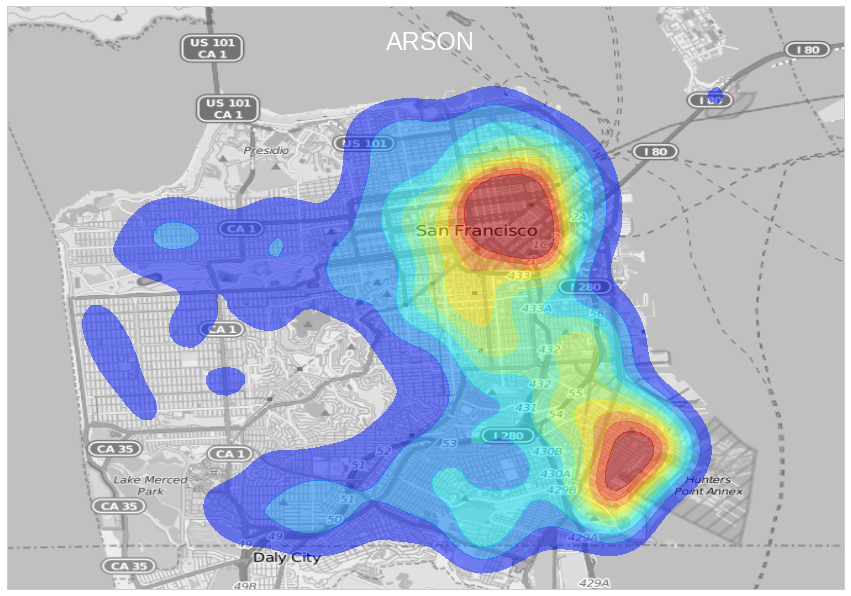

time: 5.25 s


In [47]:
xx, yy, Z = get_heatmap(pd_sfpd, clipsize, "ARSON")
plot_one_heatmap(xx, yy, Z, clipsize, "ARSON.png")

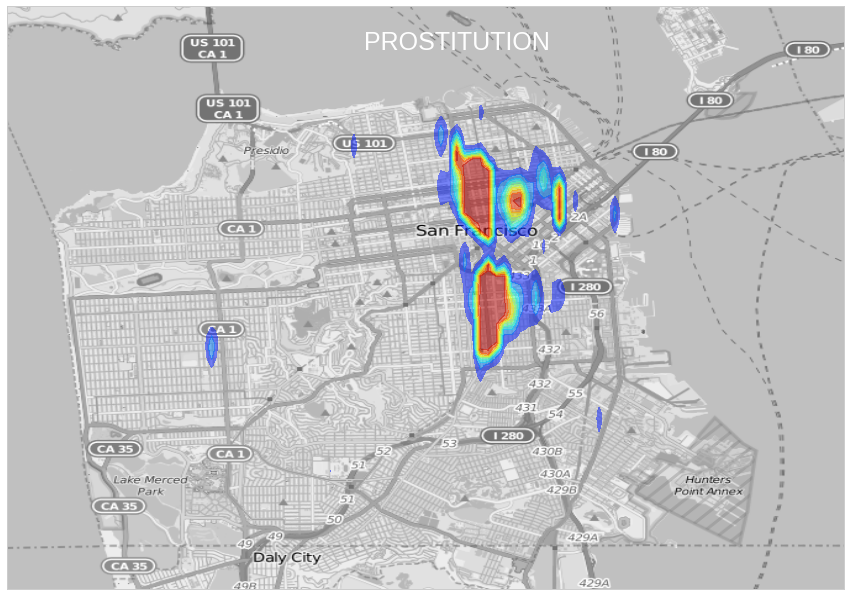

time: 11.1 s


In [48]:
xx, yy, Z = get_heatmap(pd_sfpd, clipsize, "PROSTITUTION")
plot_one_heatmap(xx, yy, Z, clipsize, "PROSTITUTION.png")